## This Code not using Directly Dataset from Tensorflow but using image dataset online

# Import Libraries


## Install TensorFlow 2


In [1]:
# !pip install tensorflow --upgrade

In [2]:
import tensorflow as tf
tf.__version__

2025-04-23 05:35:47.948999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 05:35:47.949023: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 05:35:47.949049: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 05:35:47.955828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-23 05:35:48.840923: W tensorflow/compiler/

'2.14.1'


## Import other libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image


##  Loading Dataset


In [4]:
import tensorflow as tf
import os
import random
import shutil
from sklearn.model_selection import train_test_split

import tensorflow as tf
import os
import random
import shutil
from sklearn.model_selection import train_test_split

# Define your dataset directory
data_dir = "dataset"

# Get all class names (subdirectories)
class_names = os.listdir(data_dir)
class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]

# Collect all image paths and their corresponding labels
image_paths = []
labels = []

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.endswith(".jpg"):  # Adjust the extension based on your images
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(label)

# Split the data into train/test using sklearn's train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create a function to load and preprocess images
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Change to tf.image.decode_png() if your images are PNGs
    image = tf.image.resize(image, [120, 120])  # Resize images to 120x120 (or any size you prefer)
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Create the train and test datasets using tf.data
train_set = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
test_set = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Map the load_image function to the datasets
train_set = train_set.map(lambda x, y: load_image(x, y))
test_set = test_set.map(lambda x, y: load_image(x, y))

# Optionally, shuffle, batch, and prefetch the datasets
train_set = train_set.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_set = test_set.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Now you can use train_set and test_set for training


2025-04-23 05:35:50.613534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-23 05:35:50.640546: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [49]:
print(f"Total images in dataset: {len(image_paths)}")

Total images in dataset: 9144


## Dataset Information

In [6]:
# Print number of classes
print("Classes:")
for idx, class_name in enumerate(class_names):
    print(f"{idx}: {class_name}")

# Print number of images in train and test datasets
print("\nNumber of images in train dataset:", len(train_paths))
print("Number of images in test dataset:", len(test_paths))


Classes:
0: saxophone
1: joshua_tree
2: airplanes
3: gerenuk
4: ibis
5: stop_sign
6: strawberry
7: pyramid
8: mayfly
9: wheelchair
10: nautilus
11: octopus
12: cannon
13: gramophone
14: stapler
15: BACKGROUND_Google
16: schooner
17: metronome
18: revolver
19: crocodile
20: lamp
21: watch
22: elephant
23: kangaroo
24: ketch
25: Faces_easy
26: yin_yang
27: pigeon
28: cougar_face
29: sunflower
30: lotus
31: okapi
32: laptop
33: emu
34: dragonfly
35: bonsai
36: rhino
37: chair
38: flamingo
39: wrench
40: cellphone
41: electric_guitar
42: dollar_bill
43: ant
44: buddha
45: butterfly
46: panda
47: menorah
48: Motorbikes
49: headphone
50: camera
51: rooster
52: bass
53: Faces
54: lobster
55: hawksbill
56: beaver
57: binocular
58: brontosaurus
59: scissors
60: garfield
61: flamingo_head
62: starfish
63: helicopter
64: pizza
65: soccer_ball
66: crayfish
67: sea_horse
68: anchor
69: tick
70: scorpion
71: ferry
72: car_side
73: brain
74: ewer
75: stegosaurus
76: minaret
77: wild_cat
78: crab
79: 

### Detailed Information

In [50]:
# Print detailed information about the dataset
# Load a sample image from the train dataset to get its shape and dtype
sample_image_path = train_paths[0]  # Take the first image in the train set
image = tf.io.read_file(sample_image_path)  # Read the image file
sample_image = tf.image.decode_jpeg(image, channels=3)  # Decode the image (3 channels for RGB)
sample_image = tf.image.resize(sample_image, [120, 120])  # Resize image to 224x224 for consistency
# Print dataset information
print("Image shape    :", sample_image.shape)  # Image shape after decoding and resizing
print("Image dtype    :", sample_image.dtype)  # Image dtype after decoding
print()

# Print the number of classes and the class labels
print("Num class      :", len(class_names))  # Total number of classes
print("Class labels   :", class_names)  # Class names (subdirectory names)
print()

# Print the number of images in the train and test sets
print("Number of train data :", len(train_paths))  # Number of images in the train set
print("Number of test data  :", len(test_paths))  # Number of images in the test set

Image shape    : (120, 120, 3)
Image dtype    : <dtype: 'float32'>

Num class      : 102
Class labels   : ['saxophone', 'joshua_tree', 'airplanes', 'gerenuk', 'ibis', 'stop_sign', 'strawberry', 'pyramid', 'mayfly', 'wheelchair', 'nautilus', 'octopus', 'cannon', 'gramophone', 'stapler', 'BACKGROUND_Google', 'schooner', 'metronome', 'revolver', 'crocodile', 'lamp', 'watch', 'elephant', 'kangaroo', 'ketch', 'Faces_easy', 'yin_yang', 'pigeon', 'cougar_face', 'sunflower', 'lotus', 'okapi', 'laptop', 'emu', 'dragonfly', 'bonsai', 'rhino', 'chair', 'flamingo', 'wrench', 'cellphone', 'electric_guitar', 'dollar_bill', 'ant', 'buddha', 'butterfly', 'panda', 'menorah', 'Motorbikes', 'headphone', 'camera', 'rooster', 'bass', 'Faces', 'lobster', 'hawksbill', 'beaver', 'binocular', 'brontosaurus', 'scissors', 'garfield', 'flamingo_head', 'starfish', 'helicopter', 'pizza', 'soccer_ball', 'crayfish', 'sea_horse', 'anchor', 'tick', 'scorpion', 'ferry', 'car_side', 'brain', 'ewer', 'stegosaurus', 'minar

In [51]:
#class_labels = dataset_info.features["label"].names
# Path to save the label file
labels_path = "new_model/labels.txt"  # Specify the full path to the file

# Save the labels to the file
with open(labels_path, 'w') as f:
    for label in class_names:
        f.write(f"{label}\n")

print(f"Labels saved to {labels_path}")


Labels saved to new_model/labels.txt


## Show Images

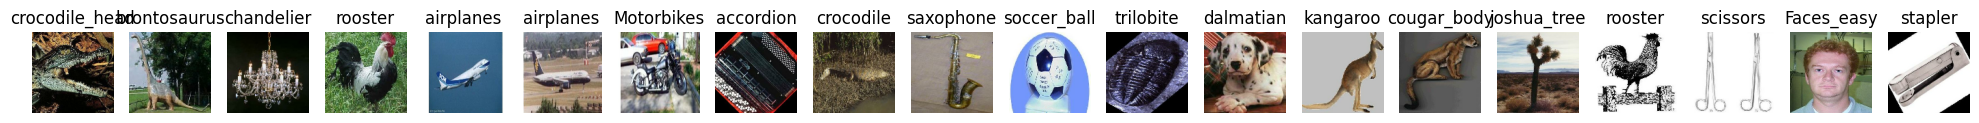

In [8]:
# Now we can display a few examples from the train dataset
def plot_images(dataset, num_images=20):
    plt.figure(figsize=(25, 5))
    for i, (image_batch, label_batch) in enumerate(dataset.take(1)):  # Get only the first batch
        for j in range(min(num_images, image_batch.shape[0])):  # Ensure we don't try to plot more images than the batch size
            image = image_batch[j].numpy()  # Convert tensor to numpy array
            label = label_batch[j].numpy()  # Get the label for the image
            plt.subplot(1, num_images, j + 1)
            plt.imshow(image)
            plt.title(class_names[label])  # Display class name as title
            plt.axis('off')
    plt.show()

# Display 20 examples from the train dataset
plot_images(train_set, num_images=20)

# Preprocess Image

Convert and Resize Dataset to Numpy

In [9]:
# input_shape = (120, 120, 3)

### Convert Data Train

In [10]:
import tensorflow_datasets as tfds
import cv2 as cv

# Define the input shape you want (height, width) for resizing
input_shape = (120, 120)  # Resize to 120x120 (height, width)

X_train = []
y_train = []

# Assuming train_set is already loaded from TensorFlow Datasets and is in 'tuple' format
for image, label in tfds.as_numpy(train_set):
    # Print the shape of the image to verify it's in the expected format
    # print("Original image shape:", image.shape)
    
    # Loop over each image in the batch (if the shape is (32, 120, 120, 3))
    for idx in range(image.shape[0]):  # Ensure you iterate over the batch
        img = image[idx]  # Get the individual image
        label_value = label[idx]  # Get the corresponding label
        
        # Resize image to the desired shape (input_shape)
        new_img = cv.resize(img, input_shape, interpolation=cv.INTER_AREA)
        
        # Print the shape of the resized image to verify
        # print("Resized image shape:", new_img.shape)
        
        # Append resized image and label to lists
        X_train.append(new_img)
        y_train.append(label_value)

del train_set

# Now X_train and y_train should have the same number of samples
print("Final number of training samples:", len(X_train), len(y_train))


Final number of training samples: 7315 7315


In [11]:
import numpy as np

# Assuming X_train and y_train are populated correctly as lists of images and labels
X_train = np.asarray(X_train)

# y_train should already be a flat list of labels (integers)
if isinstance(y_train[0], (int, np.int32, np.int64)):  # Check if the first element is an integer
    y_train = np.array(y_train)  # Convert to NumPy array
else :
    y_train = [item for sublist in y_train for item in sublist]
    y_train = np.array(y_train)

# Check the shapes of both arrays
print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)

X_train.shape = (7315, 120, 120, 3)
y_train.shape = (7315,)


### Convert Data Test

In [12]:
import tensorflow_datasets as tfds
import cv2 as cv

# Define the input shape you want (height, width) for resizing
input_shape = (120, 120)  # Resize to 120x120 (height, width)

X_test = []
y_test = []

# Assuming train_set is already loaded from TensorFlow Datasets and is in 'tuple' format
for image, label in tfds.as_numpy(test_set):
    # Print the shape of the image to verify it's in the expected format
    # print("Original image shape:", image.shape)
    
    # Loop over each image in the batch (if the shape is (32, 120, 120, 3))
    for idx in range(image.shape[0]):  # Ensure you iterate over the batch
        img = image[idx]  # Get the individual image
        label_value = label[idx]  # Get the corresponding label
        
        # Resize image to the desired shape (input_shape)
        new_img = cv.resize(img, input_shape, interpolation=cv.INTER_AREA)
        
        # Print the shape of the resized image to verify
        # print("Resized image shape:", new_img.shape)
        
        # Append resized image and label to lists
        X_test.append(new_img)
        y_test.append(label_value)

del test_set

# Now X_test and y_test should have the same number of samples
print("Final number of test samples:", len(X_test), len(y_test))


Final number of test samples: 1829 1829


In [13]:
import numpy as np

# Assuming X_test and y_test are populated correctly as lists of images and labels
X_test = np.asarray(X_test)

# y_test should already be a flat list of labels (integers)
if isinstance(y_test[0], (int, np.int32, np.int64)):  # Check if the first element is an integer
    y_test = np.array(y_test)  # Convert to NumPy array
else :
    y_test = [item for sublist in y_test for item in sublist]
    y_test = np.array(y_test)

# Check the shapes of both arrays
print('X_test.shape =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_test.shape = (1829, 120, 120, 3)
y_test.shape = (1829,)


In [14]:
# import numpy as np

# # Assuming X_test and y_test are populated correctly as lists of images and labels
# X_test = np.asarray(X_test)

# # y_test should already be a flat list of labels (integers)
# y_test = np.array(y_test)  # If not already a NumPy array, convert it

# # Check the shapes of both arrays
# print('X_test.shape =', X_test.shape)
# print('y_test.shape =', y_test.shape)


## Split Data Train into Train and Val

In [15]:
X_val   = X_train[-300:]
y_val   = y_train[-300:]

X_train = X_train[:-300]
y_train = y_train[:-300]

In [16]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (7015, 120, 120, 3)
y_train.shape = (7015,)

X_val.shape  = (300, 120, 120, 3)
y_val.shape  = (300,)

X_test.shape  = (1829, 120, 120, 3)
y_test.shape  = (1829,)


# One hot y labels

In [17]:
y_train_hot = to_categorical(y_train, 102)
y_val_hot   = to_categorical(y_val, 102)
y_test_hot  = to_categorical(y_test, 102)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (7015, 102)
y_val_hot.shape   = (300, 102)
y_test_hot.shape  = (1829, 102)


---
# Classification Model

## Create Model

For Example in this program Using inception-resnet-v2

In [18]:
model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

In [19]:
x = model.layers[-1].output
x = GlobalAveragePooling2D() (x)
# Used for classifying 102 Classes
predictions = Dense(102, activation='softmax') (x)

myModel = Model(inputs=model.input, outputs=predictions)

## Visualize Model

In [20]:
myModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 59, 59, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 59, 59, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 59, 59, 32)           0         ['batch_normalization[0][0

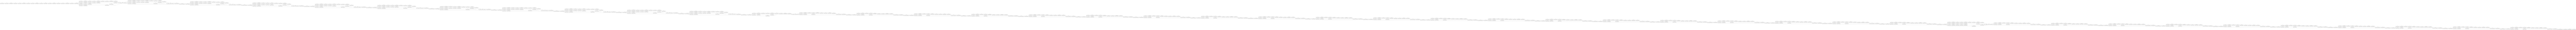

In [21]:
plot_model(model, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

## Compile Model



In [22]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

---
# [Optional] Data Augmentation

In [23]:
print("X_train shape:", X_train.shape)
print("y_train_hot shape:", y_train_hot.shape)


X_train shape: (7015, 120, 120, 3)
y_train_hot shape: (7015, 102)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    horizontal_flip=True
)



# Check the shape of the y_train (it should match the number of samples in X_train)
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {len(y_train)}")

# # Ensure that y_train has the same number of samples as X_train
# assert len(y_train) == X_train.shape[0], f"y_train should have {X_train.shape[0]} samples but has {len(y_train)}"

# # One-hot encode the labels (y_train)
# num_classes = len(np.unique(y_train))  # Automatically determine the number of classes
# y_train_hot = to_categorical(y_train, num_classes=num_classes)

# # Verify the shape after one-hot encoding
# print("y_train_hot shape:", y_train_hot.shape)

# # Ensure that both X_train and y_train_hot have the same number of samples
# assert X_train.shape[0] == y_train_hot.shape[0], f"Shape mismatch: X_train has {X_train.shape[0]} samples, y_train_hot has {y_train_hot.shape[0]} samples"

# # Initialize ImageDataGenerator with augmentation
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     channel_shift_range=0.1,
#     horizontal_flip=True
# )

# [Optional] Callbacks
* Checkpoint
* Learning Rate Annealing
* etc, have fun

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-4
    # lr = 1e-3
    if (epoch > 30):
        lr *= 0.01
    elif (epoch > 20):
        lr *= 0.1
    return lr

lr_callback = LearningRateScheduler(lr_schedule)

myCheckpoint = ModelCheckpoint(filepath='new_model/my_model.h5',
                               monitor='val_accuracy',
                               save_best_only=True,
                              )

# Train the Model

In [26]:
history_all = []

In [27]:
batch_size = 64
epochs = 25

In [28]:
from keras.utils import to_categorical
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

history = myModel.fit(
    augmented_train,
    validation_data=(X_val, y_val_hot),
    epochs=epochs,
    steps_per_epoch=len(X_train)//64,
    callbacks=[lr_callback, myCheckpoint],
    verbose=2)

history_all.append(history)

Epoch 1/25


/home/alnuco/python_env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 - 883s - loss: 2.2377 - accuracy: 0.5373 - val_loss: 0.8815 - val_accuracy: 0.7900 - lr: 1.0000e-04 - 883s/epoch - 8s/step
Epoch 2/25
109/109 - 785s - loss: 0.5601 - accuracy: 0.8625 - val_loss: 0.4870 - val_accuracy: 0.8800 - lr: 1.0000e-04 - 785s/epoch - 7s/step
Epoch 3/25
109/109 - 784s - loss: 0.2537 - accuracy: 0.9366 - val_loss: 0.4206 - val_accuracy: 0.8933 - lr: 1.0000e-04 - 784s/epoch - 7s/step
Epoch 4/25
109/109 - 739s - loss: 0.1331 - accuracy: 0.9671 - val_loss: 0.4159 - val_accuracy: 0.8767 - lr: 1.0000e-04 - 739s/epoch - 7s/step
Epoch 5/25
109/109 - 662s - loss: 0.0973 - accuracy: 0.9735 - val_loss: 0.4295 - val_accuracy: 0.8700 - lr: 1.0000e-04 - 662s/epoch - 6s/step
Epoch 6/25
109/109 - 658s - loss: 0.0699 - accuracy: 0.9816 - val_loss: 0.7700 - val_accuracy: 0.8633 - lr: 1.0000e-04 - 658s/epoch - 6s/step
Epoch 7/25
109/109 - 661s - loss: 0.0452 - accuracy: 0.9891 - val_loss: 0.6545 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 661s/epoch - 6s/step
Epoch 8/25
109/10

## Plot Current History Training

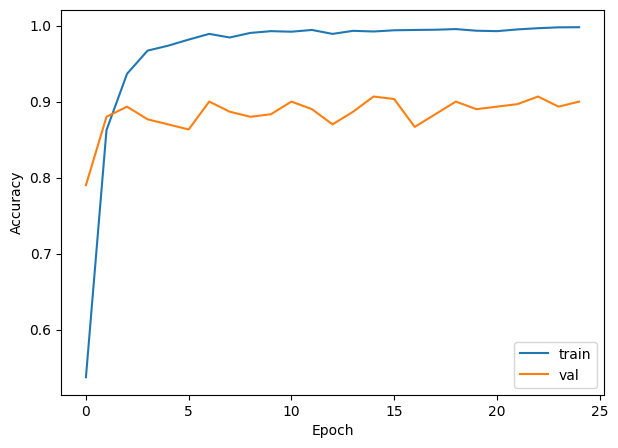

In [29]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Plot All History Training

In [30]:
hist_train = []
hist_val = []

for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])

In [31]:
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)

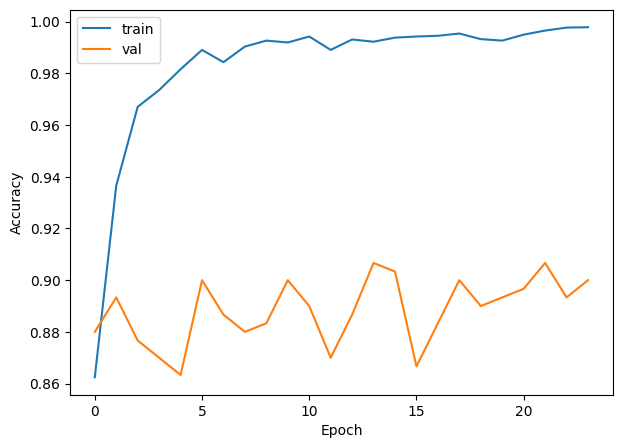

In [32]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Evaluate Model


In [33]:
myModel.load_weights('new_model/my_model.h5')
scores = myModel.evaluate(X_test, y_test_hot)

58/58 [==============================] - 35s 597ms/step - loss: 0.4171 - accuracy: 0.9049


In [34]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 0.4171052873134613
Test accuracy: 90.49%


---
# Load Model Again

Load  model my_model.h5 file


In [35]:
myModel.load_weights('new_model/my_model.h5')

# Re-Evaluate Model


In [36]:
train_scores = myModel.evaluate(X_train, y_train_hot)
test_scores  = myModel.evaluate(X_test, y_test_hot)
val_scores   = myModel.evaluate(X_val, y_val_hot)

2025-04-23 10:21:47.948558: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1212192000 exceeds 10% of free system memory.


10/10 [==============================] - 6s 565ms/step - loss: 0.5088 - accuracy: 0.9067


In [37]:
print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

Train Loss: 0.01572 with Accuracy: 99.6%
Test  Loss: 0.41711 with Accuracy: 90.5%
Val   Loss: 0.50877 with Accuracy: 90.7%


---
# Test the image from the internet


In [46]:
!wget -O 'data_test_0.jpg' 'https://preview.redd.it/0f1zcxn28nb61.jpg?auto=webp&s=100e1f42d52c485e4fc9cea2b2b586d7ca16e36e'
!wget -O 'data_test_1.jpg' 'https://i.ytimg.com/vi/3JQNMG2VhDM/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBa9lXMoMO8D2hb51kMbabozIx3tQ'
!wget -O 'data_test_2.jpg' 'https://th.bing.com/th/id/OIP.mCgUxdBEfECvh43WhuqYbwHaE6?w=274&h=182&c=7&r=0&o=5&dpr=1.3&pid=1.7'
!wget -O 'data_test_3.jpg' 'https://www.oist.jp/sites/default/files/styles/background_image_xl_1x/public/2024-07/Lglry1b9.jpeg?h=3fa38beb&itok=kHkth1o8'
!wget -O 'data_test_4.jpg' 'https://th.bing.com/th/id/OIP.ucLpB-LS0XFz1vf_Ec4iWgHaJD?w=170&h=206&c=7&r=0&o=5&pid=1.7'
!wget -O 'data_test_5.jpg' 'https://static.spiru.com/wp-content/uploads/2021/10/pexels-diego-madrigal-539694-scaled.jpg'

--2025-04-23 17:01:34--  https://preview.redd.it/0f1zcxn28nb61.jpg?auto=webp&s=100e1f42d52c485e4fc9cea2b2b586d7ca16e36e
Resolving preview.redd.it (preview.redd.it)... 151.101.129.140, 151.101.1.140, 151.101.65.140, ...
Connecting to preview.redd.it (preview.redd.it)|151.101.129.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64202 (63K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]  62.70K  --.-KB/s    in 0.1s    

2025-04-23 17:01:35 (464 KB/s) - ‘data_test_0.jpg’ saved [64202/64202]

--2025-04-23 17:01:35--  https://i.ytimg.com/vi/3JQNMG2VhDM/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBa9lXMoMO8D2hb51kMbabozIx3tQ
Resolving i.ytimg.com (i.ytimg.com)... 142.251.10.119, 172.253.118.119, 74.125.130.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.251.10.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89912 (88K) [image/jpeg]
Saving to: ‘data_test_1.

1/1 [==============================] - 0s 56ms/step


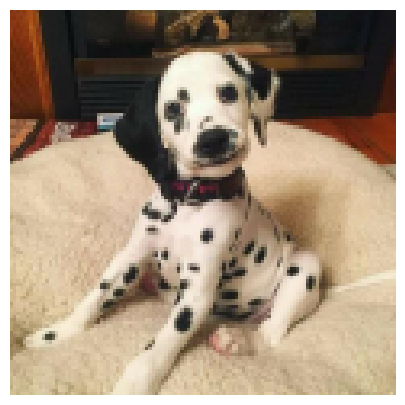

Predicted ID: 96
Class prediction: dalmatian
1/1 [==============================] - 0s 62ms/step


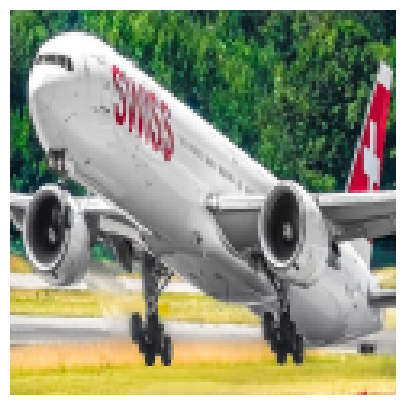

Predicted ID: 2
Class prediction: airplanes
1/1 [==============================] - 0s 63ms/step


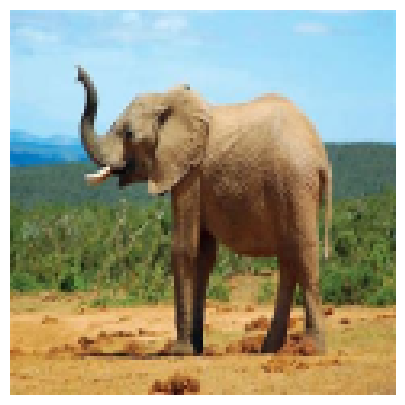

Predicted ID: 22
Class prediction: elephant
1/1 [==============================] - 0s 57ms/step


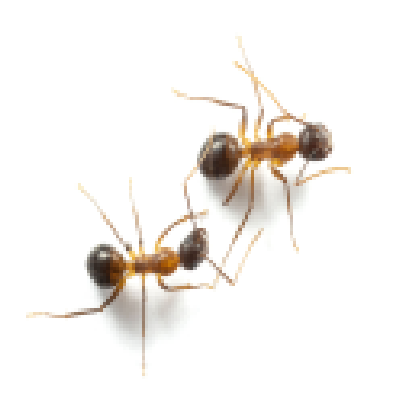

Predicted ID: 43
Class prediction: ant
1/1 [==============================] - 0s 71ms/step


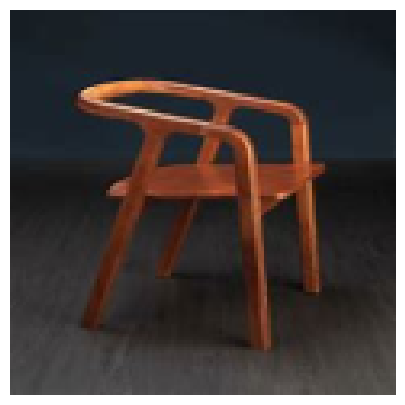

Predicted ID: 93
Class prediction: windsor_chair
1/1 [==============================] - 0s 55ms/step


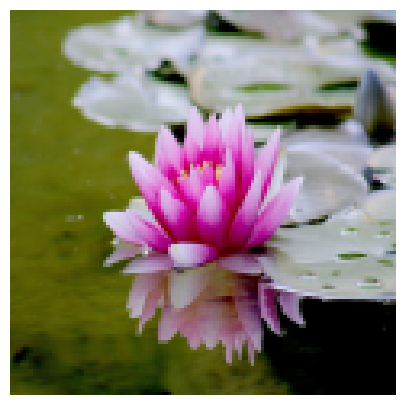

Predicted ID: 30
Class prediction: lotus


In [48]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv

input_shape = (120, 120)

for i in range(6):
    # Load image
    new_img = Image.open('data_test_' + str(i) + '.jpg').convert('RGB')
    new_img = np.array(new_img)

    # Resize
    new_img2 = cv.resize(new_img, input_shape, interpolation=cv.INTER_AREA)

    # Normalize and ensure float32
    new_img2 = new_img2 / 255.0
    new_img2 = new_img2.astype(np.float32)

    # Add batch dimension
    new_img2 = np.expand_dims(new_img2, 0)

    # Predict
    pred = myModel.predict(new_img2)
    class_id = np.argmax(pred)

    # Display
    plt.imshow(new_img2[0])
    plt.axis('off')
    plt.show()

    print('Predicted ID:', class_id)
    print('Class prediction:', class_names[class_id])
